순환 신경망은 순서가 있는 데이터를 입력으로 받고, 같은 네트워크를 이용해 변화하는 입력에 대한 출력을 얻어낸다.

음악, 자연어, 날씨, 주가 등 시간의 흐름에 따라 변화하고 으미ㅣ를 갖는 데이터이다.

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

# 7.1 순환 신경망의 구조

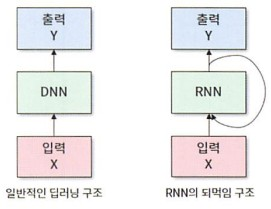  

- 출력값이 다음 입력을 받을 때의 RNN네트워크에도 동일하게 전달된다.

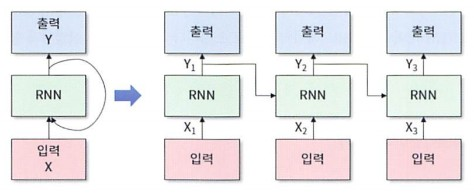

- 입 출력의 길이에 제한이 없다.
- 이미지에 대한 설명을 생성하는 이미지 설명 생성
- 문장의 긍/부정을 판단하는 감정분석
- 하나의 언어를 다른 언어로 번역하는 기계번역 등

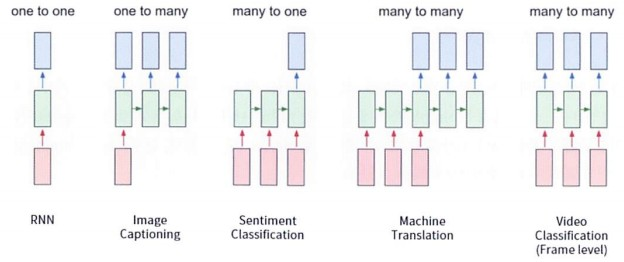

# 7.2 주요 레이어 정리

- simple RNN이 기본이다
- LSTM, GRU레이어가 주로 쓰인다
- 자연어 처리를 위해서 임베딩 레이어도 쓰인다.

## 7.2.1 Simple RNN 레이어

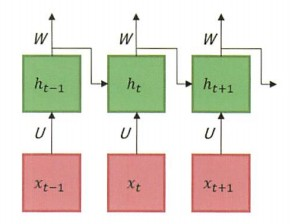

In [2]:
# 7.1 SimpleRNN 레이어 생성 코드

# units는 레이어에 존재하는 뉴런 수
# return_sequences는 출력으로 시퀀스 전체를 출력할지 여부를 선택하는 옵션 주로 여러개 레이어를 쌓을 때 사용
rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)

In [3]:
# 7.2 시퀀스 예측 데이터 생성
X = []
Y = []
for i in range(6):
    # [0,1,2,3], [1,2,3,4] 같은 정수의 시퀀스를 만듭니다.
    lst = list(range(i,i+4))

    # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장합니다.
    # SimpleRNN 에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장합니다.
    X.append(list(map(lambda c: [c/10], lst)))

    # 정답에 해당하는 4, 5 등의 정수를 역시 위처럼 10으로 나눠서 저장합니다.
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [19]:
# 7.3 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),# [4,1]은 각각 timesteps,input_dim을 나타낸다.
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_16 (SimpleRNN)    (None, 10)                120       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


- timesteps는 순환 신경망이 입력에 대해 계산을 반복하는 횟수
- input_dim은 입력 벡터의 크기

In [ ]:
for i in range(len(X)):# X는 [1,4,1]차원의 벡터
    print(X[i], Y[i])
 # 가장 첫 차원은 배치 차원이기 때문에 생략
 # 두 번째 4는 타임스텝
 # 세 번째 1은 input_dim이다.

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


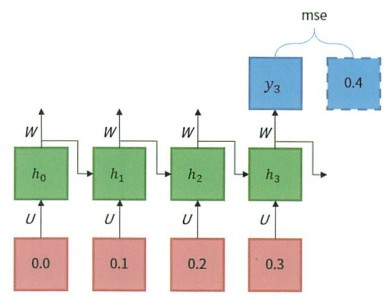

- 시퀀스 예측 모델은 4 타임스텝에 걸쳐 입력을 받고 마지막에 출력값을 다음 레이어로 반환한다.
- $$Dense 레이어에 별도의 활성화 함수가 없기 때문에h_3은  바로 y_3가 된다$$

In [ ]:
# 7.4 네트워크 훈련 및 결과 확인
model.fit(X, Y, epochs=100, verbose=0)# verbose=0을 지정하면 훈련 과정에서의 출력이 나오지 않게 할수있다.
print(model.predict(X))

[[0.5026074 ]
 [0.5870395 ]
 [0.6568203 ]
 [0.7124626 ]
 [0.75539726]
 [0.78746206]]


In [ ]:
# 7.5 학습되지 않은 시퀀스에 대한 예측 결과
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]])))
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

[[0.8105389]]
[[0.40447825]]


- 결과를 개선하려면 훈련 데이터를 더 많이 넣어주는게 필요하다.

## 7.2.2 LSTM 레이어

SimpleRNN 레이어에는 학 가지 치명적인 단점이 있다. 입력 데이터가 길어질수록, 타임스텝이 커질수록 학습능력이 떨어진다. 이를 장기의존성 문제라 한다.

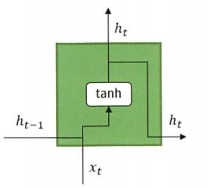

이를 해결하기 위해 LSTM을 개바했다.

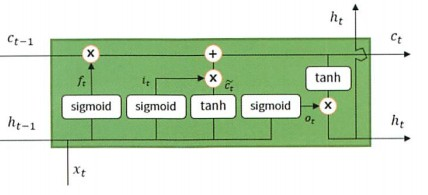

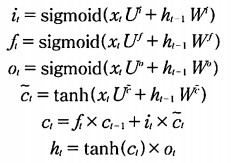

In [ ]:
# 7.6 곱셈 문제 데이터 생성
X = []
Y = []
for i in range(3000):
    # 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
    lst = np.random.rand(100)
    # 마킹할 숫자 2개의 인덱스를 뽑습니다.
    idx = np.random.choice(100, 2, replace=False)
    # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X 에 저장합니다.
    X.append(np.array(list(zip(zeros, lst))))
    # 마킹 인덱스가 1인 값들만 서로 곱해서 Y 에 저장합니다.
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[0.00000000e+00 3.65854281e-01]
 [0.00000000e+00 5.26867810e-01]
 [0.00000000e+00 2.26406054e-02]
 [0.00000000e+00 7.65945929e-01]
 [0.00000000e+00 4.22219302e-01]
 [0.00000000e+00 6.58997912e-01]
 [0.00000000e+00 6.13875538e-01]
 [0.00000000e+00 9.32664665e-01]
 [0.00000000e+00 9.17266456e-01]
 [0.00000000e+00 4.07062155e-01]
 [0.00000000e+00 4.58054949e-01]
 [0.00000000e+00 2.33373096e-01]
 [0.00000000e+00 6.81849987e-01]
 [0.00000000e+00 5.81112399e-03]
 [0.00000000e+00 7.83316106e-01]
 [0.00000000e+00 3.76504269e-01]
 [0.00000000e+00 2.20492632e-01]
 [0.00000000e+00 2.02038577e-01]
 [0.00000000e+00 9.74947146e-01]
 [0.00000000e+00 8.02870353e-01]
 [0.00000000e+00 9.91914208e-01]
 [0.00000000e+00 6.62442697e-01]
 [0.00000000e+00 2.65638052e-02]
 [0.00000000e+00 4.92975786e-01]
 [0.00000000e+00 9.00341456e-01]
 [0.00000000e+00 7.78662502e-02]
 [0.00000000e+00 2.57613853e-01]
 [0.00000000e+00 9.93781159e-01]
 [0.00000000e+00 7.61660360e-01]
 [0.00000000e+00 9.98861610e-04]
 [0.000000

In [ ]:
# 7.7 SimpleRNN 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]), # return_sequences는 레이어의 출력을 다음 레이어로 그대로 넘겨주게 된다.
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.8 SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)
# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 7s 99ms/step - loss: 0.1758 - val_loss: 0.0580
Epoch 2/100
64/64 [==============================] - 6s 91ms/step - loss: 0.0492 - val_loss: 0.0549
Epoch 3/100
64/64 [==============================] - 5s 85ms/step - loss: 0.0495 - val_loss: 0.0563
Epoch 4/100
64/64 [==============================] - 5s 85ms/step - loss: 0.0446 - val_loss: 0.0548
Epoch 5/100
64/64 [==============================] - 6s 92ms/step - loss: 0.0485 - val_loss: 0.0574
Epoch 6/100
64/64 [==============================] - 6s 94ms/step - loss: 0.0482 - val_loss: 0.0545
Epoch 7/100
64/64 [==============================] - 6s 95ms/step - loss: 0.0512 - val_loss: 0.0557
Epoch 8/100
64/64 [==============================] - 6s 91ms/step - loss: 0.0467 - val_loss: 0.0544
Epoch 9/100
64/64 [==============================] - 6s 96ms/step - loss: 0.0457 - val_loss: 0.0551
Epoch 10/100
64/64 [==============================] - 6s 95ms/step - loss: 0.0458 - val_loss: 0.0544

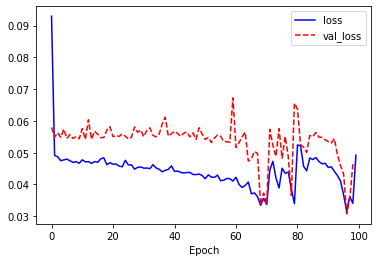

In [ ]:
# 7.9 SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

- 과적합 그래프

In [ ]:
# 7.10 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 0s 15ms/step - loss: 0.0396
0.5554048425685428 	 0.38535467 	diff: 0.17005017466655004
0.01525674928373359 	 0.12103802 	diff: 0.10578127037340142
0.009917207582886379 	 0.36356473 	diff: 0.35364752210766537
0.3884106861665736 	 0.38996854 	diff: 0.001557858078192642
0.4561048531452839 	 0.265153 	diff: 0.1909518623272602
correctness: 15.681818181818183 %


- evaluate로 0.0805의 loss가 나왔다.
- 정확도는 9.32% 

In [ ]:
# 7.11 LSTM 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.12 LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 8s 20ms/step - loss: 0.0548 - val_loss: 0.0537
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0499 - val_loss: 0.0538
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0463 - val_loss: 0.0542
Epoch 4/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0475 - val_loss: 0.0552
Epoch 5/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0489 - val_loss: 0.0538
Epoch 6/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0498 - val_loss: 0.0546
Epoch 7/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0478 - val_loss: 0.0544
Epoch 8/100
64/64 [==============================] - 1s 13ms/step - loss: 0.0478 - val_loss: 0.0537
Epoch 9/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0460 - val_loss: 0.0537
Epoch 10/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0453 - val_loss: 0.0539

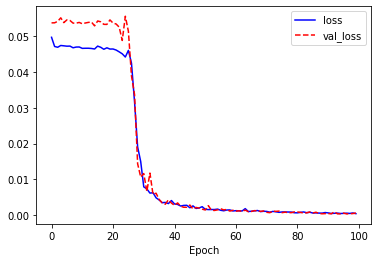

In [ ]:
# 7.13 LSTM 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 7.14 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 1s 6ms/step - loss: 7.1632e-04
0.5554048425685428 	 0.5949249 	diff: 0.039520084189269666
0.01525674928373359 	 0.026610617 	diff: 0.011353867310819403
0.009917207582886379 	 0.07993537 	diff: 0.07001816429287656
0.3884106861665736 	 0.4021265 	diff: 0.013715804903220108
0.4561048531452839 	 0.4984788 	diff: 0.042373946913080995
correctness: 91.36363636363637 %


## 7.2.3 GRU레이어

LSTM과 비슷한 역할을 하지만 구조가 더 간단해서 계산상 이점이있다.

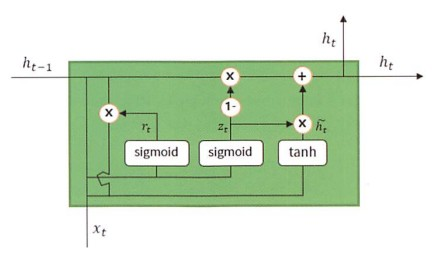

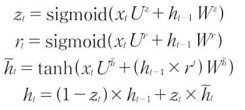

In [ ]:
# 7.15 GRU 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


- LSTM 파리미터
> 11,311
- GRU 파라미터
> 8,671

In [ ]:
# 7.16 GRU 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 3s 19ms/step - loss: 0.0612 - val_loss: 0.0548
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0449 - val_loss: 0.0549
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0497 - val_loss: 0.0553
Epoch 4/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0484 - val_loss: 0.0541
Epoch 5/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0457 - val_loss: 0.0542
Epoch 6/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0457 - val_loss: 0.0553
Epoch 7/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0465 - val_loss: 0.0553
Epoch 8/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0471 - val_loss: 0.0561
Epoch 9/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0473 - val_loss: 0.0545
Epoch 10/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0447 - val_loss: 0.0543

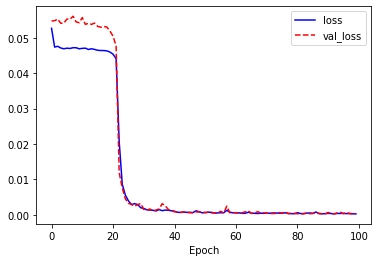

In [ ]:
# 7.17 GRU 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

- LSTM은 40 에포크에서 가파르게 줄어들었지만 GRU는 20에포크에서 값이 줄어들고 변화도 안정적이다.

In [ ]:
# 7.18 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 1s 6ms/step - loss: 3.3542e-04
0.5554048425685428 	 0.5444327 	diff: 0.010972142888214464
0.01525674928373359 	 0.020260623 	diff: 0.0050038734411571185
0.009917207582886379 	 0.01685569 	diff: 0.0069384830454037975
0.3884106861665736 	 0.36703032 	diff: 0.0213803636148463
0.4561048531452839 	 0.45089898 	diff: 0.005205878011387999
correctness: 97.04545454545455 %


- GRU는 적은 파라미터를 가지지만 비슷한 성능을 하고, 곱셈 문제를 포함한 일부 문제에서는 더 좋은 성능을 낼수 있다는 것을 확인했다.

## 7.2.4 임베딩 레이어

자연어를 수치화된 정보로 바꾸기 위한 레이어다.

- 자연어는 시간의 흐름에 따라 정보가 연속적으로 이어지는 시퀀스 데이터다.
- 영어는 문자(character), 한글은 문자를 넘어 자소 단위로도 쪼갤 수 있다.
-  더 큰 단위는 듸어쓰기 단위인 단어가 있다.
- 몇개의 문자를 묶어서 파악하려는 n-gram기법이 있다.

자연어를 구성하는 단위에 대해 정수 인덱스를 저장하는 방법이 더 쉽다.

# 7.3 긍정, 부정 감성 분석

입력된 자연어 안의 주관적 의견, 감정 등을 찾아내는 문제다.

감정 분석은 문장의 긍정/부정/중립을 분류한다.

In [ ]:
# 7.19 Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4898816/4893335 [==============================] - 0s 0us/step


In [ ]:
# 7.20 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

# 처음 300 자를 확인해봅니다.
print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


- 각 행은 탭 문자(\t)로 구분돼있다.
- id는 고유 id, document는 리뷰내용, label은 긍/부정이다.

In [ ]:
# 7.21 학습을 위한 정답 데이터(Y) 만들기
# 각 텍스트를 개행문자(\n)으로 분리한 다음 헤더에 해당하는 부분을 제외한 나머지([1:])에 대해 각 생을 처리한다.
# 각 행은 \t 로 나눠진 후 2번째원소를 정수로 변환해서 저장한다.
# np.array로 결과 리스트를 감싸서 네트워크에 입력하기 쉽게 한다.
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [ ]:
# 7.22 train 데이터의 입력(X)에 대한 정제(Cleaning)
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):     # 다수의 정규표현식을 사용 첫 번째 인수에 해당하는 내용을 찾아서 두번째인수로 단순히 교체
    # 세 번째 인수에서 첫 번째 인수를 찾아서 두번째 인수로 교체해준다.
    # ^ 는 대괄호 안의 내용을 찾은 다음, 그에 포함되지 않는 나머지 모두를 선택한다는 의미
    # 대괄호 안의 내용 이외의 인수는 모두 공백으로 바꾼다는 뜻이다.
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string) 
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


- 입력을 위한 데이터 크기의 길이는 동일해야하는데 각 문장의길이가 다르다.
- 적당한 길이를 확인하고 긴것을 줄이고 짧은것은 공백을 의미하는 패딩을 해줘야한다.

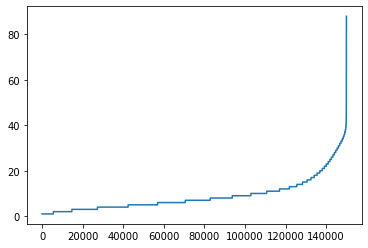

142587


In [ ]:
# 7.23 각 문장의 단어 길이 확인
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

- Y축은 문장의 단어 개수다. 15만개 중 대부분은 40단어 이하로 구성되어있다.
- 25단어 이하인 문장수는 약 95%다. 이를 기준으로 삼는다.
- 단어의 최대 길이도 조정해야한다. 
- 조절하면 단어가 가진 의미가 어느정도 보전되어 여러 개의 단어에 분산될 수 있는 의미를 하나로 모을 수 있다.

In [ ]:
# 7.24 단어 정제 및 문장 길이 줄임
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [ ]:
# 7.25 Tokenizer와 pad_sequences를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer # 출현 빈도가 가장 높은 일부 단어만 사용하기 위해 사용
from tensorflow.keras.preprocessing.sequence import pad_sequences # 짤븡 문장을 같은 길이로 바꾸기 위핸 패딩

tokenizer = Tokenizer(num_words=20000) # 지정된 숫자만큼 반환 나머지는 0으로 반환
tokenizer.fit_on_texts(sentences) # 데이터를 실제로 입력
train_X = tokenizer.texts_to_sequences(sentences) # 문장을 입력받아 숫자를 반환
train_X = pad_sequences(train_X, padding='post') # 입력된 데이터에 패딩을 더한다. pre= 문장앞 post=문장뒤

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


- 0으로 처리된 단어들을 보니 Tokenizer에서 걸러진 단어가 많은 것을 확인할수있다.

In [ ]:
# 7.26 Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가']) 
print(temp)
temp = pad_sequences(temp, padding='post') # 여기를 통과하면 0으로 바뀐다. maxlen을 지정 안했기 때문에 입력된 문장 전체의 길이 중 가장 긴 길이로 문장의 길이를 맞춘다.
print(temp)

경우는
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


In [ ]:
# 7.27 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.28 감성 분석 모델 학습
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 58s 61ms/step - loss: 0.4946 - accuracy: 0.7324 - val_loss: 0.3820 - val_accuracy: 0.8239
Epoch 2/5
938/938 [==============================] - 57s 61ms/step - loss: 0.3187 - accuracy: 0.8509 - val_loss: 0.3827 - val_accuracy: 0.8205
Epoch 3/5
938/938 [==============================] - 58s 62ms/step - loss: 0.2655 - accuracy: 0.8726 - val_loss: 0.4325 - val_accuracy: 0.8178
Epoch 4/5
938/938 [==============================] - 58s 62ms/step - loss: 0.2241 - accuracy: 0.8898 - val_loss: 0.4838 - val_accuracy: 0.8102
Epoch 5/5
938/938 [==============================] - 58s 62ms/step - loss: 0.1891 - accuracy: 0.9046 - val_loss: 0.5557 - val_accuracy: 0.8035


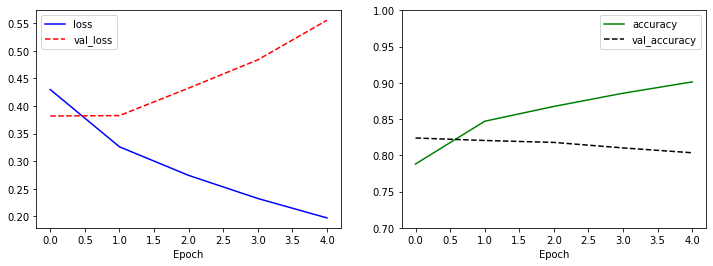

In [ ]:
# 7.29 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

- 과적합이 되는것으로 보인다.
> 임베딩 레이어를 랜덤한 값에서부터 시작해서 학습시키기 때문에 각 단어를 나타내는 벡터의 품질이 좋지 않다.
- 임베딩 레이어를 별도로 학습시켜 CNN을 사용하는 방법이 있다.

In [ ]:
# 7.30 테스트 데이터 평가
# test_X를 만들어 model.evaluate()로 평가
# test_X를 만들때 Tokenizer를 변경없이 그대로 사용한다.
# Tokenizer는 훈련 데이터로만 학습 시켜야 한다.
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

[0.5639373660087585, 0.7996799945831299]

In [ ]:
# 7.31 임의의 문장 감성 분석 결과 확인
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['재미있을']
[0.5369252 0.4630748]
['재미있을', '줄']
[0.46966946 0.53033054]
['재미있을', '줄', '알았는데']
[0.4532898  0.54671013]
['재미있을', '줄', '알았는데', '완전']
[0.47158113 0.5284189 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.47158113 0.5284189 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.64332753 0.3566724 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.99144614 0.00855386]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[0.9981964  0.00180357]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[0.9981964  0.00180357]


# 7.4 자연어 생성

##7.4.1 단어 단위 생성

In [ ]:
# 7.32 조선왕조실록 데이터 파일 다운로드
path_to_file = tf.keras.utils.get_file('input.txt', 'http://bit.ly/2Mc3SOV')

62013440/62012502 [==============================] - 0s 0us/step


In [ ]:
# 7.33 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print()

# 처음 100 자를 확인해봅니다.
print(train_text[:100])

Length of text: 26265493 characters

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 
태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏)요, 휘


In [ ]:
# 7.34 훈련 데이터 입력 정제
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string


train_text = train_text.split('\n')
train_text = [clean_str(sentence) for sentence in train_text]
train_text_X = []
for sentence in train_text:
    train_text_X.extend(sentence.split(' '))
    train_text_X.append('\n')
    
train_text_X = [word for word in train_text_X if word != '']

print(train_text_X[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']


In [ ]:
# 7.35 단어 토큰화
# 단어의 set을 만듭니다.
vocab = sorted(set(train_text_X))
vocab.append('UNK')
print ('{} unique words'.format(len(vocab)))

# vocab list를 숫자로 맵핑하고, 반대도 실행합니다.
word2idx = {u:i for i, u in enumerate(vocab)}
idx2word = np.array(vocab)

text_as_int = np.array([word2idx[c] for c in train_text_X])

# word2idx 의 일부를 알아보기 쉽게 print 해봅니다.
print('{')
for word,_ in zip(word2idx, range(10)):
    print('  {:4s}: {:3d},'.format(repr(word), word2idx[word]))
print('  ...\n}')

print('index of UNK: {}'.format(word2idx['UNK']))

332640 unique words
{
  '\n':   0,
  '!' :   1,
  ',' :   2,
  '000명으로':   3,
  '001':   4,
  '002':   5,
  '003':   6,
  '004':   7,
  '005':   8,
  '006':   9,
  ...
}
index of UNK: 332639


In [ ]:
# 7.36 토큰 데이터 확인
print(train_text_X[:20])
print(text_as_int[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413]


In [ ]:
# 7.37 기본 데이터셋 만들기
seq_length = 25
examples_per_epoch = len(text_as_int) // seq_length
sentence_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

sentence_dataset = sentence_dataset.batch(seq_length+1, drop_remainder=True)
for item in sentence_dataset.take(1):
    print(idx2word[item.numpy()])
    print(item.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',' '휘']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2 330313]


In [ ]:
# 7.38 학습 데이터셋 만들기
def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = sentence_dataset.map(split_input_target)
for x,y in train_dataset.take(1):
    print(idx2word[x.numpy()])
    print(x.numpy())
    print(idx2word[y.numpy()])
    print(y.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2]
휘
330313


In [ ]:
# 7.39 데이터셋 shuffle, batch 설정
BATCH_SIZE = 512
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
# 7.40 단어 단위 생성 모델 정의
total_words = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=100),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 100)           33264000  
_________________________________________________________________
lstm_3 (LSTM)                (None, 25, 100)           80400     
_________________________________________________________________
dropout (Dropout)            (None, 25, 100)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 332640)            33596640  
Total params: 67,021,440
Trainable params: 67,021,440
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.41 단어 단위 생성 모델 학습
from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 49:
        return
    test_sentence = train_text[0]

    next_words = 100
    for _ in range(next_words):
        test_text_X = test_sentence.split(' ')[-seq_length:]
        test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])

        output_idx = model.predict_classes(test_text_X)
        test_sentence += ' ' + idx2word[output_idx[0]]
    
    print()
    print(test_sentence)
    print()

testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

Epoch 1/50
533/533 - 289s - loss: 8.7218 - accuracy: 0.0723


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



 태조 이성계 선대의 가계 목조 이안사가 전주에서 삼척 의주를 거쳐 알동에 정착하다  , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ,

Epoch 2/50
533/533 - 289s - loss: 8.2420 - accuracy: 0.0769
Epoch 3/50
533/533 - 289s - loss: 7.9551 - accuracy: 0.0862
Epoch 4/50
533/533 - 289s - loss: 7.6343 - accuracy: 0.1002
Epoch 5/50
533/533 - 291s - loss: 7.2939 - accuracy: 0.1171
Epoch 6/50
533/533 - 292s - loss: 6.9667 - accuracy: 0.1321

 태조 이성계 선대의 가계 목조 이안사가 전주에서 삼척 의주를 거쳐 알동에 정착하다  한다 
 하니 , 임금이 , 
 하니 , 임금이 , 
 하니 , 임금이 , 
 하니 , 임금이 , 
 하니 , 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 계하기를 , 임금이 계하기를 을 계하기를 에 보내어 계하기를 을 보내어 계하기를 을 보내어 계하기를 에 나아가 계하기를 에 나아가 계하기를 에 나아가 계하기를 에 나아가 계하기를 에 나아가 계하기를 에 상왕이 계하기를 에 나아가 계하기를 에 상왕이 계하기를 에 상왕이 계하기를 을 계하기를 에 보내어 계하기를 에 나아가 계하기를 에 나아가 계하기를 에 나아가 계하기를 에 나아가 계하기를 에 나아가 계하기를 에 나아가

Epoch 7/50
533/533 - 292s - loss: 6.6525 - accuracy: 0.1452
Epoch

In [ ]:
# 7.42 임의의 문장을 사용한 생성 결과 확인
from tensorflow.keras.preprocessing.sequence import pad_sequences
test_sentence = '동헌에 나가 공무를 본 후 활 십오 순을 쏘았다'

next_words = 100
for _ in range(next_words):
    test_text_X = test_sentence.split(' ')[-seq_length:]
    test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
    test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])
    
    output_idx = model.predict_classes(test_text_X)
    test_sentence += ' ' + idx2word[output_idx[0]]

print(test_sentence)